In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', None)

In [ ]:
url = "https://docs.google.com/spreadsheets/d/1vqhSDunXT-WVXFAkWov7i3HQlCjHLxYDw8sl9tRf1zE/export?format=csv&gid=959588729"
df = pd.read_csv(url)
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
df_1 = df.copy()

df_1.drop(['track_id', 'track_name', 'Unnamed: 0', 'artists'], axis=1, inplace=True)

df_1['album_name'] = df_1['album_name'].map(df_1['album_name'].value_counts())


In [ ]:
le = LabelEncoder()

## Changing the genre to numeric using LabelEncoder — the reason being that there are too many categories for one-hot encoding.
df_1['track_genre'] = le.fit_transform(df_1['track_genre'])

In [ ]:
df_1.head()

,album_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,4.0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,0
1,2.0,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,0
2,1.0,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,0
3,1.0,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,0
4,6.0,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,0


In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [ ]:
mode_replace_album_name = df_1['album_name'].mode()
df_1['album_name'] = df_1['album_name'].fillna(1)

In [ ]:
df_1.isnull().sum()

album_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [ ]:
X = df_1.loc[:,df_1.columns!='popularity']
y = df_1[['popularity']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.3,
                                                   shuffle=True,
                                                   random_state=42)

In [ ]:
X_train_v2, X_test_v2, y_train_v2, y_test_v2 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [ ]:
gbc = GradientBoostingRegressor(max_depth=5, random_state=42, learning_rate=0.01, n_estimators=200)
gbc.fit(X_train, y_train)

c:\Users\brian\anaconda3\envs\newenvi\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoostingRegressor(learning_rate=0.01, max_depth=5, n_estimators=200,
                          random_state=42)

In [ ]:
r2_score_list = []

for k in range(1, 17):
    selector = SelectKBest(mutual_info_regression, k=k)
    selector.fit(X_train_v2, y_train_v2)
    
    sel_X_train_v2 = selector.transform(X_train_v2)
    sel_X_test_v2 = selector.transform(X_test_v2)
    
    gbc.fit(sel_X_train_v2, y_train_v2)
    kbest_preds = gbc.predict(sel_X_test_v2)
    
    r2_score_kbest = round(r2_score(y_test_v2, kbest_preds), 3)
    
    r2_score_list.append(r2_score_kbest)

c:\Users\brian\anaconda3\envs\newenvi\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\brian\anaconda3\envs\newenvi\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
c:\Users\brian\anaconda3\envs\newenvi\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\brian\anaconda3\envs\newenvi\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passe

<Figure size 640x480 with 0 Axes>

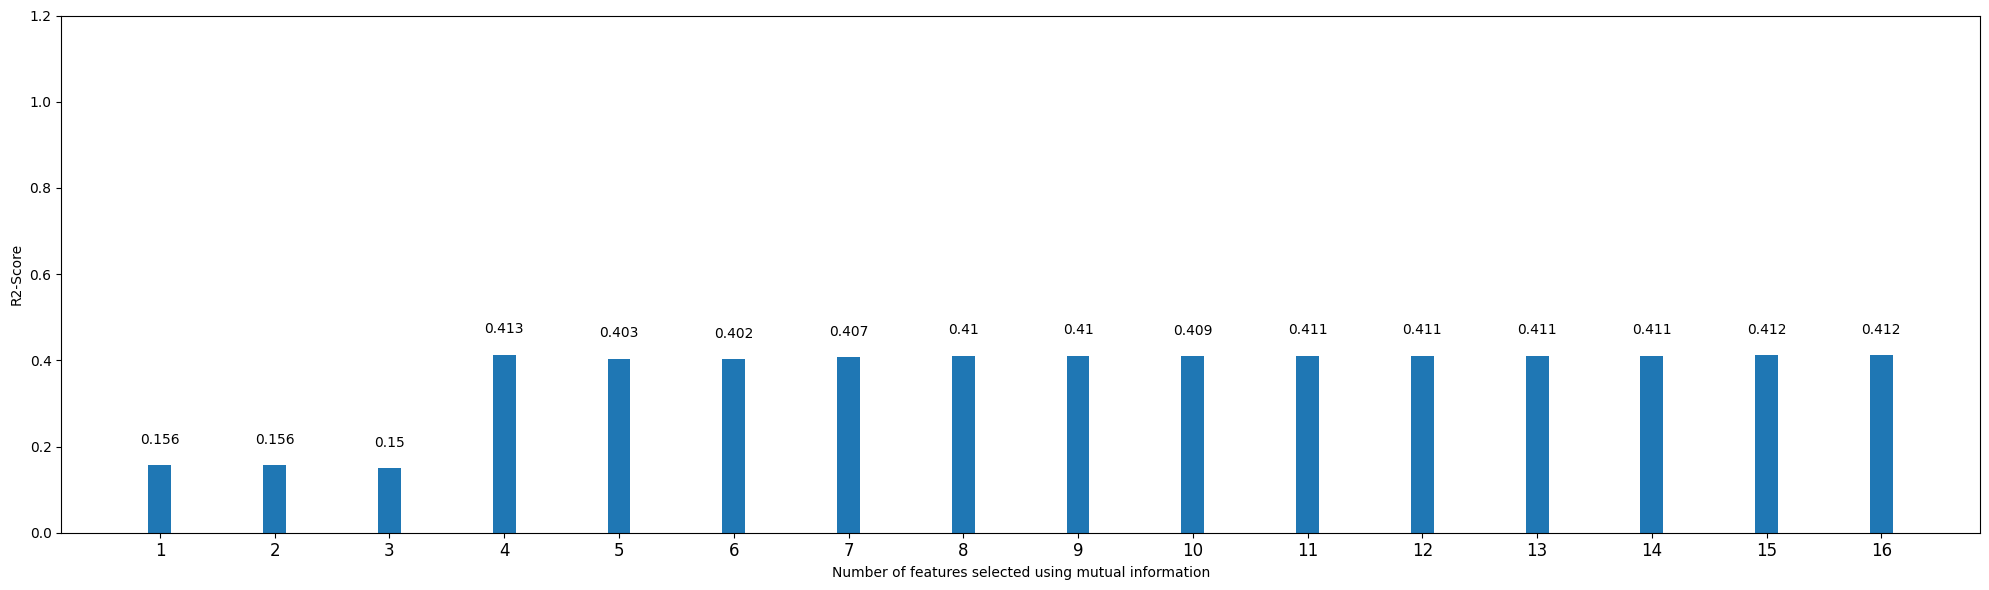

In [ ]:
plt.figure()  # Increase width (e.g., 12) to expand the plot

fig, ax = plt.subplots(figsize=(20, 6))

x = np.arange(1, 17)
y = r2_score_list

ax.bar(x, y, width=0.2)
ax.set_xlabel('Number of features selected using mutual information')
ax.set_ylabel('R2-Score')
ax.set_ylim(0, 1.2)
ax.set_xticks(np.arange(1, 17))
ax.set_xticklabels(np.arange(1, 17), fontsize=12)

for i, v in enumerate(y):
    plt.text(x=i+1, y=v+0.05, s=str(v), ha='center')
    
plt.tight_layout()

## Applying PyCaret

In [ ]:
from pycaret.regression import *
s = setup(df_1, target = 'popularity', session_id = 123)

,Description,Value
0,Session id,123
1,Target,popularity
2,Target type,Regression
3,Original data shape,"(114000, 17)"
4,Transformed data shape,"(114000, 17)"
5,Transformed train set shape,"(79800, 17)"
6,Transformed test set shape,"(34200, 17)"
7,Numeric features,15
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,8.6078,145.9844,12.0820,0.7062,0.7536,0.4702,11.0000
et,Extra Trees Regressor,8.7884,152.7834,12.3603,0.6925,0.7406,0.4770,4.1020
xgboost,Extreme Gradient Boosting,9.2811,163.1398,12.7717,0.6717,0.8616,0.5272,0.2130
catboost,CatBoost Regressor,9.4683,166.9223,12.9187,0.6641,0.8845,0.5417,3.3670
lightgbm,Light Gradient Boosting Machine,10.2112,189.7202,13.7728,0.6182,0.9171,0.5741,0.2320
gbr,Gradient Boosting Regressor,12.6130,263.5073,16.2322,0.4697,1.0498,0.7325,2.3230
dt,Decision Tree Regressor,10.5743,303.6599,17.4226,0.3887,0.8606,0.5279,0.2130
ada,AdaBoost Regressor,15.8802,357.4221,18.9051,0.2806,1.3186,1.1188,0.6380
lar,Least Angle Regression,15.8195,369.4605,19.2209,0.2564,1.2862,1.0753,0.0400
br,Bayesian Ridge,15.8260,369.4321,19.2202,0.2564,1.2860,1.0752,0.0470


In [ ]:
print(best)

RandomForestRegressor(n_jobs=-1, random_state=123)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
## X_train, X_test, y_train, y_test
rf = RandomForestRegressor(n_jobs=-1, random_state=123, n_estimators=200)

rf.fit(X_train, y_train)

train_pred = rf.predict(X_train)

test_pred = rf.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, r2_score


r2_score_train = r2_score(train_pred,y_train)
r2_score_test = r2_score(test_pred,y_test)


print(r2_score_train)
print(r2_score_test)

0.9489570453084925
0.5286462973040116


### Still not enough as I have 0.7 R2 Score but low MAPE. While the R-squared value suggests that my model captures a reasonable amount of variance, the MAPE indicates that the model might not be very accurate at the individual prediction level.

In [ ]:
## Lets bin our target and make it a classifier

df_2 = df_1.copy()

bins = [0, 20, 40, 60, 80, 100]

labels = ['0-20', '20-40', '40-60', '60-80', '80-100']

df_2['score_binned'] = pd.cut(df_2['popularity'], bins=bins, labels=labels, include_lowest=True)

df_2.drop(['popularity'], axis=1, inplace=True)

df_2.head()


,album_name,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,score_binned
0,4.0,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,0,60-80
1,2.0,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,0,40-60
2,1.0,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,0,40-60
3,1.0,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,0,60-80
4,6.0,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,0,80-100


In [ ]:
from pycaret.classification import *
s = setup(df_2, target = 'score_binned', session_id = 123)

,Description,Value
0,Session id,123
1,Target,score_binned
2,Target type,Multiclass
3,Target mapping,"0-20: 0, 20-40: 1, 40-60: 2, 60-80: 3, 80-100: 4"
4,Original data shape,"(114000, 17)"
5,Transformed data shape,"(114000, 17)"
6,Transformed train set shape,"(79800, 17)"
7,Transformed test set shape,"(34200, 17)"
8,Numeric features,15
9,Preprocess,True


In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7184,0.9057,0.7184,0.7290,0.7156,0.6080,0.6101,3.1080
et,Extra Trees Classifier,0.7145,0.9021,0.7145,0.7279,0.7130,0.6028,0.6049,1.7940
xgboost,Extreme Gradient Boosting,0.7115,0.9066,0.7115,0.7121,0.7085,0.6001,0.6010,0.8130
catboost,CatBoost Classifier,0.6999,0.9000,0.6999,0.6995,0.6950,0.5833,0.5844,12.6670
lightgbm,Light Gradient Boosting Machine,0.6948,0.8986,0.6948,0.6941,0.6903,0.5762,0.5775,1.2810
gbc,Gradient Boosting Classifier,0.6412,0.0000,0.6412,0.6429,0.6289,0.4975,0.5008,12.2370
dt,Decision Tree Classifier,0.6287,0.7482,0.6287,0.6295,0.6290,0.4911,0.4911,0.2440
ada,Ada Boost Classifier,0.5032,0.0000,0.5032,0.5037,0.4870,0.3008,0.3048,0.7040
ridge,Ridge Classifier,0.4930,0.0000,0.4930,0.4509,0.4681,0.2828,0.2880,0.0700
lda,Linear Discriminant Analysis,0.4864,0.0000,0.4864,0.4948,0.4666,0.2742,0.2830,0.0800


In [ ]:
print(best)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


In [ ]:
df_2.columns

Index(['album_name', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre', 'score_binned'],
      dtype='object')

In [ ]:
X = df_2.loc[:,df_2.columns!='score_binned']
y = df_2[['score_binned']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.3,
                                                   shuffle=True,
                                                   stratify = y,
                                                   random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfcls = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
        

In [ ]:
rfcls.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [ ]:
rf_model_train = rfcls.predict(X_train)
rf_model_test = rfcls.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
print("Accuracy Train: ", accuracy_score(rf_model_train, y_train))
print("Accuracy Test: ", accuracy_score(rf_model_test, y_test))

Accuracy Train:  0.9990350877192983
Accuracy Test:  0.725906432748538


In [ ]:
print("F1 Score Train: ", f1_score(rf_model_train, y_train, average='weighted'))
print("F1 Score Test: ", f1_score(rf_model_test, y_test, average='weighted'))

F1 Score Train:  0.9990351214697833
F1 Score Test:  0.7281099160077836


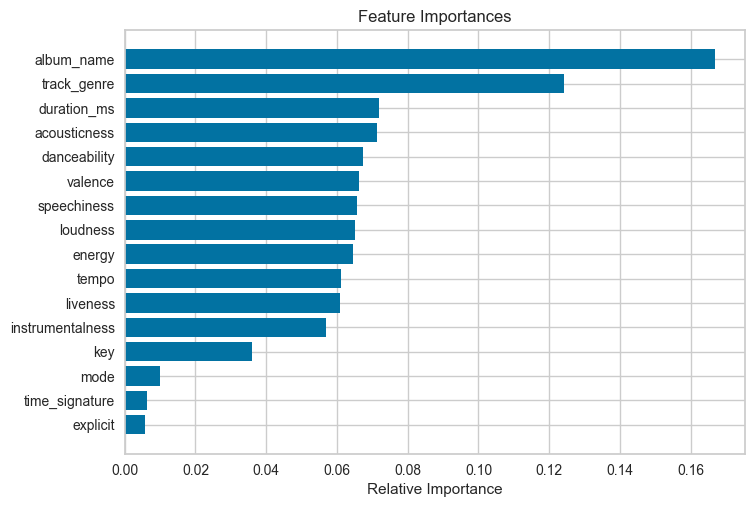

In [ ]:
## Looking for the best attributes:
features = df_2.columns
importances = rfcls.feature_importances_
indices = np.argsort(importances)[-17:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [ ]:
## Checking Using K Best
from sklearn.feature_selection import mutual_info_classif


X_train_v2, X_test_v2, y_train_v2, y_test_v2 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [ ]:
f1_score_list = []

for k in range(1, 17):
    selector = SelectKBest(mutual_info_classif, k=k)
    selector.fit(X_train_v2, y_train_v2)
    
    sel_X_train_v2 = selector.transform(X_train_v2)
    sel_X_test_v2 = selector.transform(X_test_v2)
    
    rfcls.fit(sel_X_train_v2, y_train_v2)
    kbest_preds = rfcls.predict(sel_X_test_v2)
    
    f1_score_kbest = round(f1_score(y_test_v2, kbest_preds, average='weighted'), 3)
    
    f1_score_list.append(f1_score_kbest)

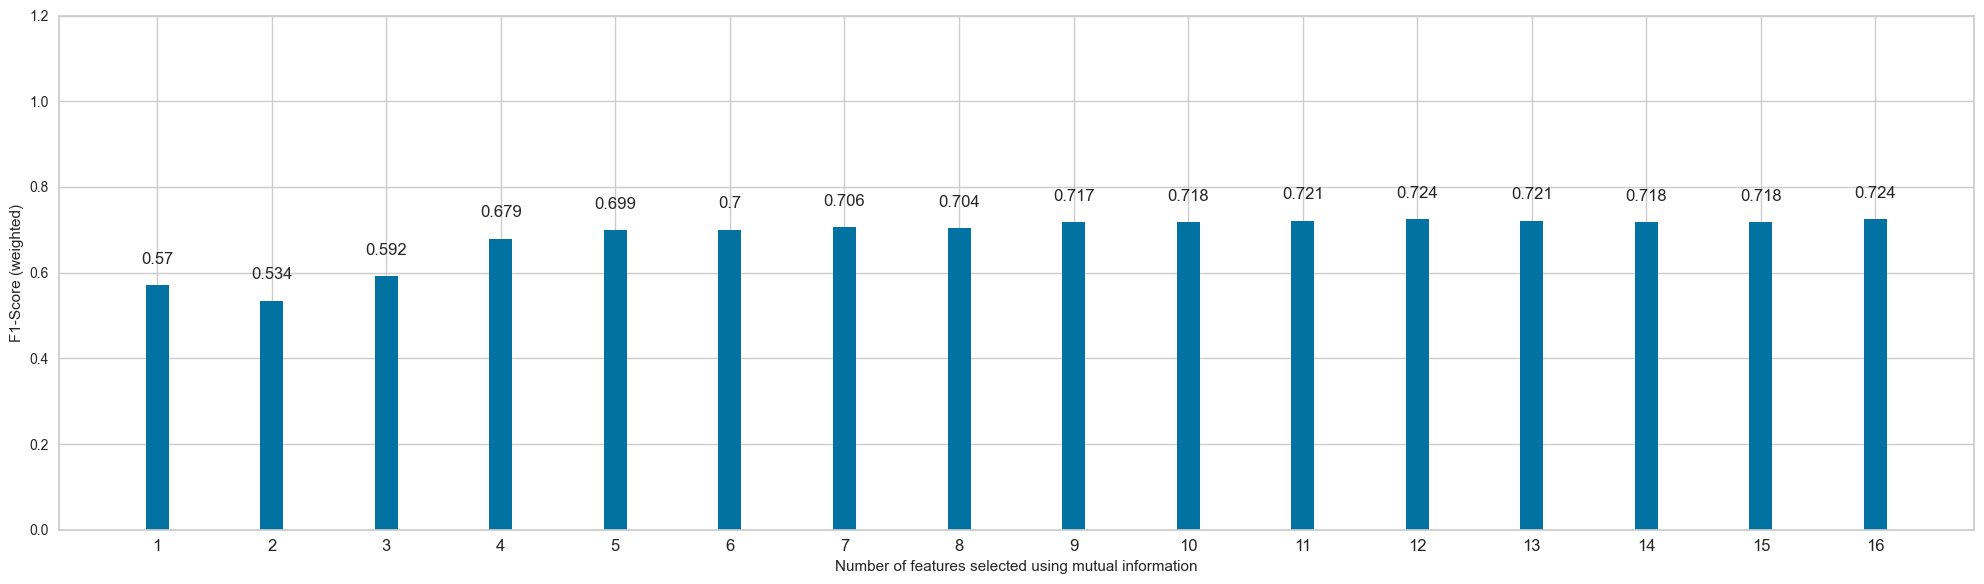

In [ ]:
fig, ax = plt.subplots(figsize=(20, 6))

x = np.arange(1, 17)
y = f1_score_list

ax.bar(x, y, width=0.2)
ax.set_xlabel('Number of features selected using mutual information')
ax.set_ylabel('F1-Score (weighted)')
ax.set_ylim(0, 1.2)
ax.set_xticks(np.arange(1, 17))
ax.set_xticklabels(np.arange(1, 17), fontsize=12)

for i, v in enumerate(y):
    plt.text(x=i+1, y=v+0.05, s=str(v), ha='center')
    
plt.tight_layout()

## Check the Imbalance

In [ ]:
df_2['score_binned'].value_counts()

## You can notice imbalance for 80 - 100. I sugget 4 bins only instead of 5

score_binned
0-20      34177
20-40     33149
40-60     33104
60-80     12616
80-100      954
Name: count, dtype: int64

In [ ]:
## Lets bin our target and make it a classifier

df_3 = df_1.copy()

bins = [0, 30, 100]

labels = ['Top 30', 'Below 30']

df_3['score_binned'] = pd.cut(df_3['popularity'], bins=bins, labels=labels, include_lowest=True)

df_3.drop(['popularity'], axis=1, inplace=True)

df_3.head()


,album_name,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,score_binned
0,4.0,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,0,Below 30
1,2.0,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,0,Below 30
2,1.0,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,0,Below 30
3,1.0,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,0,Below 30
4,6.0,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,0,Below 30


In [ ]:
X = df_3.loc[:,df_3.columns!='score_binned']
y = df_3[['score_binned']]

In [ ]:
from pycaret.classification import *
s = setup(df_3, target = 'score_binned', session_id = 123)

,Description,Value
0,Session id,123
1,Target,score_binned
2,Target type,Binary
3,Target mapping,"Below 30: 0, Top 30: 1"
4,Original data shape,"(114000, 17)"
5,Transformed data shape,"(114000, 17)"
6,Transformed train set shape,"(79800, 17)"
7,Transformed test set shape,"(34200, 17)"
8,Numeric features,15
9,Preprocess,True


In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.8664,0.9442,0.8664,0.8663,0.8662,0.7300,0.7302,0.2130
catboost,CatBoost Classifier,0.8647,0.9413,0.8647,0.8646,0.8646,0.7266,0.7268,5.5780
lightgbm,Light Gradient Boosting Machine,0.8526,0.9333,0.8526,0.8526,0.8523,0.7017,0.7022,0.3450
rf,Random Forest Classifier,0.8501,0.9338,0.8501,0.8526,0.8489,0.6946,0.6987,2.8720
et,Extra Trees Classifier,0.8360,0.9231,0.8360,0.8421,0.8337,0.6643,0.6728,1.3110
dt,Decision Tree Classifier,0.8186,0.8172,0.8186,0.8187,0.8186,0.6341,0.6342,0.2270
gbc,Gradient Boosting Classifier,0.7971,0.8838,0.7971,0.8021,0.7942,0.5845,0.5927,2.4460
ada,Ada Boost Classifier,0.7407,0.8225,0.7407,0.7501,0.7338,0.4651,0.4802,0.6510
qda,Quadratic Discriminant Analysis,0.7078,0.7720,0.7078,0.7323,0.6912,0.3894,0.4232,0.0830
ridge,Ridge Classifier,0.6976,0.7472,0.6976,0.7121,0.6841,0.3710,0.3944,0.0750


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.3,
                                                   shuffle=True,
                                                   stratify = y,
                                                   random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfcls = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
        

In [ ]:
rfcls.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [ ]:
rf_model_train = rfcls.predict(X_train)
rf_model_test = rfcls.predict(X_test)

In [ ]:
rf_model_test

array(['Top 30', 'Below 30', 'Top 30', ..., 'Below 30', 'Top 30',
       'Below 30'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
print("Accuracy Train: ", accuracy_score(rf_model_train, y_train))
print("Accuracy Test: ", accuracy_score(rf_model_test, y_test))

Accuracy Train:  0.9995864661654136
Accuracy Test:  0.8530994152046784


In [ ]:
print("F1 Score Train: ", f1_score(rf_model_train, y_train, average='weighted'))
print("F1 Score Test: ", f1_score(rf_model_test, y_test, average='weighted'))

F1 Score Train:  0.9995864676085696
F1 Score Test:  0.854328533270504


In [ ]:
df_3['score_binned'].unique()

['Below 30', 'Top 30']
Categories (2, object): ['Top 30' < 'Below 30']

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_model_test, target_names=['Not Top 30', 'Below 30']))


              precision    recall  f1-score   support

  Not Top 30       0.83      0.92      0.87     18673
    Below 30       0.89      0.78      0.83     15527

    accuracy                           0.85     34200
   macro avg       0.86      0.85      0.85     34200
weighted avg       0.86      0.85      0.85     34200

